# Assignment II - Logistic Regression
### Year 2022-2023- Semester II
### CCE2502
####  developed by - Adrian Muscat, 2023
---

Name: Juan Scerri

ID: 0305003L

Class: Computer Science and Mathematics (Second Year)

---

In this assignment you will develop a multi-class model on the basis of the binary logistic regressor classifier. 
A number of functions are given, including the gradient descent optimizer. You will be required to develop a few more functions to build and evaluate the multi-class model.

NOTES: 
1. The maximum score is 100.

2. The assignment is worth 30% of the final unit mark.

2. Submit the jupyter notebook complete with answers and excuted code on VLE. 

## NOTE: 
This assignment is to be attempted individually. It is essential that the work you submit and present consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.

Please sign and attached the plagiarism form at:

https://www.um.edu.mt/ict/students/formsguidelines/

Warning: Late submissions will be graded 0F

# IMPORTANT NOTE
# You are only allowed to use the numpy, matplotlib, csv and pickle libraries to load data, perform calculations and visualise data.
# The use of other data science and machine learning libraries or frameworks (such as pandas, sk-learn, keras, etc) is strictly forbidden. Marks will be deducted for using such libraries.

# Part I
# Load libraries
# Do not change the code in this part

In [342]:
# import  libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pickle
%matplotlib inline

In [343]:
def lr_loss_function(y_target,y_predicted):
    #
    #y_target: actual gold labels (vector of size(m,))
    #y_predicted : predicted probabilities for positive class (vector of size (m,))
    #
    m=y_target.shape[0]
    L = -(y_target*np.log(y_predicted) + (1-y_target)*np.log(1-y_predicted)).sum()/m
    return L


def predict_y_prob(W,D):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # D is the feature matrix [m,N] where m is the number of examples
    # return a vector of size (m,1)
    #
    m = D.shape[0]
    bias = np.ones([m,1], dtype=float)
    X = np.concatenate((bias,D),axis=1)
    z = np.matmul(W.T,X.T)
    y = 1/(1+np.exp(-z))
    #
    return y.T

def get_accuracy(W,X,y):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    # Computes the accuracy
    # in predicting the positive class and returns a scalar
    #
    Y_pred = (predict_y_prob(W,X)>=0.5).astype(int)
    #
    return (Y_pred.ravel()==y).astype(int).sum()/y.shape[0]


In [344]:
# Gradient Descent algoruthm that learn the model parameters
# The update equations require the partial derivatives of the loss function
# with respect to the weights or parameter of the model
#
def lr_train_model(X_data, 
                   y_data, 
                   reshuffle = 'yes',
                   split_frac=0.8, 
                   init_weights=0.00001, 
                   no_iterations=2000,
                   alpha = 0.001,
                   phi = 0.001):
    """
    X_data : data feature matrix (including bias x_0 = 1.0)
    y_data : data output values
    split_frac : data split fraction, we require the split to compute validation mse
        if split_frac = -1 (or negative), then dataset is not split and train and val portions are the same
    init_weights : initial weights (all same value)
        if init_weights = -1 (or negative), then random weights are chosen
    alpha : learning rate
    # phi : regularisation constant
    """
    #
    idx = np.arange(0, y_data.shape[0])
    if reshuffle == 'yes':
        np.random.shuffle(idx)
    X_data = np.copy(X_data[idx])
    y_data = np.copy(y_data[idx])
    #
    split = int(y_data.shape[0]*split_frac)
    if split_frac < 0.0:
        split = y_data.shape[0]
        y_train = y_data[0:split]
        y_val = y_data[0:split]
        X_train = X_data[0:split]
        X_val = X_data[0:split]
    else:
        y_train = y_data[0:split]
        y_val = y_data[split:]
        X_train = X_data[0:split]
        X_val = X_data[split:]
    #
    N = X_data.shape[1] # number of features
    if init_weights < 0.0:
        W = 0.5*(np.random.rand((N+1))-0.5).reshape(N,1)
    else:
        W = np.full((N+1,1), init_weights) # initialise weight vectors to teh same value
    m=y_train.shape[0]
    history_loss=[]
    history_val_loss=[]
    #
    for itr in range(no_iterations):
        y_pred_pr = predict_y_prob(W,X_train).ravel()
        loss = lr_loss_function(y_train,y_pred_pr)
        history_loss.append(loss)
        history_val_loss.append(lr_loss_function(y_val,predict_y_prob(W,X_val).ravel()))
        #
        W[0] = W[0] + alpha*((y_train-y_pred_pr)).sum()/2/m
        #
        for j in range(1,N+1):
            W[j] = W[j] + alpha*((y_train-y_pred_pr)*X_train[:,j-1]-phi*W[j]).sum()/2/m
    #
    return {'weights':W, 'history':{'train_loss':history_loss,
                                    'val_loss':history_val_loss},
            'train_acc':get_accuracy(W,X_train,y_train),
            'val_acc':get_accuracy(W,X_val,y_val)}

def display_results(model):
    #
    history_train_loss = model['history']['train_loss']
    history_val_loss = model['history']['val_loss']
    t=range(len(history_train_loss))
    p1, p2 = plt.plot(t,history_train_loss,'b',t,history_val_loss,'r')
    plt.legend([p1,p2], ['Train loss','Val loss'])
    #
    print('train acc : ', model['train_acc'])
    print('val acc   : ', model['val_acc'])
    #
    print('Weights : ', model['weights'].ravel())
    return 0

# Part II Graded Questions below
# Introduction to dataset

<p>In this part you will be building a multi-class classification model.</p>
<p>You will be using a very small subset of the VRD (Visual Relation Detection) dataset, which is a real-world dataset. 
https://cs.stanford.edu/people/ranjaykrishna/vrd/ 
    
<p>The VRD task is defined as:
Given two objects, what is the relation between them?
Below is an example. The image depicts two bicycles and a person. The person is enclosed in a blue bounding box and the bicycle on the right in a green bounding box. The task of the model is to select an appropriate spatial relation between the two objects, for example</p>
<p>Person TO THE LEFT OF bicycle</p>
<p>Bicycle TO THE RIGHT OF person</p>
<img src="2008_008320_BB.jpeg" alt="drawing" width="300"/>
<p>The VRD task is not simple and the relation selected often depends on external influences, such as the frame of reference. For example humans tend to take the point of view of the depicted person rather than the camera view. For example "Bicycle TO THE LEFT OF person" is also correct. Unless corrected such labels manifest themselves as noise in the dataset and are a source of confusion during learning. Further more note that the relation changes if the order of the two objects changes. In general one object (the trajector) is located with respect to the other object (the landmark)</p>
<p>Data pre-processing is a very important task in any machine learning project and often requires significant knowledge of the domain. In the case of this assignment, the dataset has been prepared for you, complete with feature extraction and class labels since the study unit deals solely with the develpment of the model. This means that for this assignment you do not need domain knowledge and in any case the domain is from every day life and typically common sense.</p>
<p> Specifically the dataset is characterised by six real-valued features and four categorical output classes.</p>
<p> Your task is to develop a multi-class model based on the logistic-regression model developed in class. So make sure you have understood this model (lr_train_model in cell above).</p> 
<p>Execute below cells and then answer the questions that follow.</p>

In [345]:
# First, we load the dataset
data = pickle.load(open("SRD_Dataset.pkl", "rb"))
#

In [346]:
# We now explore the dataset
#
# The examples are organised as a list
print("Number of examples = ",len(data),"\n")
#
# Let us explore one example
example = data[0]
# each example is organised in a dictionary structure; check using type(example))
print("Keys in example dictionary :",data[0].keys(),"\n")
# below is an explanation for each key
# Each example refers to an image and two objects in the image
# 'filename' : filename of image
# 'imSizeX', 'imSizeY' : size of image in pixels
# 'landmark', 'trajector' : the two objects (object, subject)
# 'spatial_label' : the output class
# 'geo_feat' : the input features for the spatial configuration
#
# NOTE: In this assignment you only need to use 'spatial_label' and 'geo_feat'
#
# Let us explore 'spatial_label':
print('Some example output labels:')
for item in data[8:12]:
    print("   ",item['spatial_label'])
print()
# There are actually four unique labels in the dataset
#
# Let us explore the features
print('Feature Headings:')
for item in list(data[0]['geo_feat'].keys()):
    print("   ",item)
# The first four and the last two are somewhat correlated
# So it may be the case can we can use either or both 
# Resulting in models of various complexity
# And finally, let us see some examples of features
print("\nThe features for one example:")
feat_keys = list(data[0]['geo_feat'].keys())
for item in feat_keys:
    print("   ",data[0]['geo_feat'][item])

Number of examples =  1199 

Keys in example dictionary : dict_keys(['filename', 'imSizeX', 'imSizeY', 'landmark', 'trajector', 'spatial_label', 'geo_feat']) 

Some example output labels:
    above
    on the right of
    on the left of
    under

Feature Headings:
    InvFeatXminXmin
    InvFeatXmaxXmin
    InvFeatYminYmin
    InvFeatYmaxYmin
    unitVecTrajLand_Norm_wt_UnionBB_x
    unitVecTrajLand_Norm_wt_UnionBB_y

The features for one example:
    0.839041095890411
    1.9623287671232876
    0.11178247734138973
    0.6797583081570997
    0.9751722346356505
    0.22144776538884195


In [347]:
# DO NOT MODIFY THIS CELL
# copy features and classes into numpy arrays
geo_feat_keys = list(data[0]['geo_feat'].keys())
m = len(data)  # number of examples
N = len(geo_feat_keys) # number of features
X_data = np.zeros((m,N))
y_data = np.zeros(m)
#
# code a label encoder
label_encode = {'above':0,
                'under':1,
                'on the left of':2,
                'on the right of':3}
#
label_decode = {0:'above',
                1: 'under',
                2: 'on the left of',
                3: 'on the right of'}

#
for j, item in enumerate(data[0:]):
    # store geo_feat in array
    dummy = np.zeros(N)    
    for i, g in enumerate(geo_feat_keys):
        dummy[i] = item['geo_feat'][g]
    X_data[j,:] = np.copy(dummy)
    y_data[j] = label_encode[item['spatial_label']]
                   
    
print("Shape of X :",X_data.shape)
print("Shape of y :",y_data.shape)

Shape of X : (1199, 6)
Shape of y : (1199,)


In [348]:
# DO NOT MODIFY THIS CELL
#
# Split the dataset into train and test

S=(int)(len(data)*.8)
print(S)
X_train = X_data[0:S,0:6]
y_train = y_data[0:S]
X_test = X_data[S:,0:6]
y_test = y_data[S:]
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)
print(X_train.mean(axis=0))
print(X_train.var(axis=0))
#
# normalisation
X_mean = X_train.mean(axis=0)
X_var = X_train.var(axis=0)
X_train = (X_train - X_mean)/np.sqrt(X_var)
X_test = (X_test - X_mean)/np.sqrt(X_var)
print(X_train.var(axis=0))

959
X_train :  (959, 6)
y_train :  (959,)
X_test :  (240, 6)
y_test :  (240,)
[-0.64146693  1.65022919 -0.45602928  1.06652919 -0.01177097  0.02942184]
[12.06538029 15.63844514  4.15806149  3.05253844  0.53498208  0.46401372]
[1. 1. 1. 1. 1. 1.]


In [349]:
# Sanity Check
print(X_train.sum())
assert X_train.sum()==-5.968558980384842e-13, "Error in X_train"
#
print((X_train**2.0).sum())
assert (X_train**2.0).sum()==5753.999999999998, "Error in X_train"
#
print(y_train.sum())
assert y_train.sum()==1439.0, "Error in y_train"
#
print(X_test.sum())
assert X_test.sum()==9.515302262342551, "Error in X_test"
#
print((X_test**2.0).sum())
assert (X_test**2.0).sum()==1592.3413587473128, "Error in X_test"
#
print(y_test.sum())
assert y_test.sum()==361.0, "Error in y_test"


-5.968558980384842e-13
5753.999999999998
1439.0
9.515302262342551
1592.3413587473128
361.0


# GRADED QUESTIONS BELOW
# IMPORTANT NOTE: Provide short explanations and any comments that add value to your answers

# QUESTION 1:  [10 marks]

## Develop a function that takes as input the output variable vector (usually labelled as "y"), computes the output class distribution and plots the distribution on a bar chart 

## Use the function to plot the output class distribution for the train set and test set separately
### Note: you might find the function useful further on


In [350]:
def plot_bar_chart(data, labels=None, ylabel=None, title=None, normalize=True, debug_print=False):
    unique, counts = np.unique(data, return_counts=True)

    # print the labels and counts 
    if debug_print:
        print(dict(zip(unique, counts)))

    # normalize the data if required
    if normalize:
        counts = counts / counts.sum()

    x = np.arange(len(unique))

    plt.figure()

    plt.bar(x, counts, align='center')

    # if labels are provided use them
    if labels != None:
        plt.xticks(x, labels)
    else:
        plt.xticks(x, unique)

    # if a ylabel for the graph is provided use it
    if ylabel != None:
        plt.ylabel(ylabel)

    # if a title for the graph is provided use it
    if title != None:
        plt.title(title)

    plt.show()

{0.0: 245, 1.0: 232, 2.0: 239, 3.0: 243}


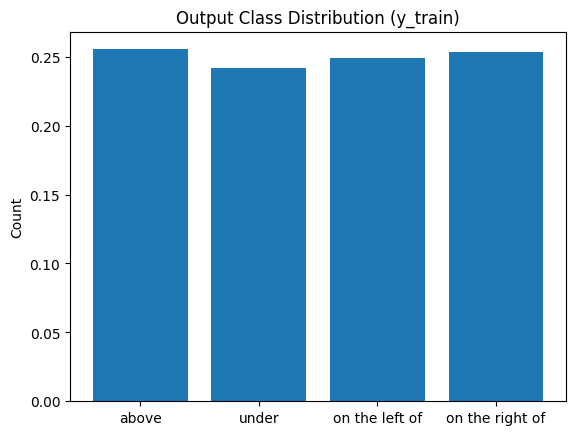

{0.0: 54, 1.0: 68, 2.0: 61, 3.0: 57}


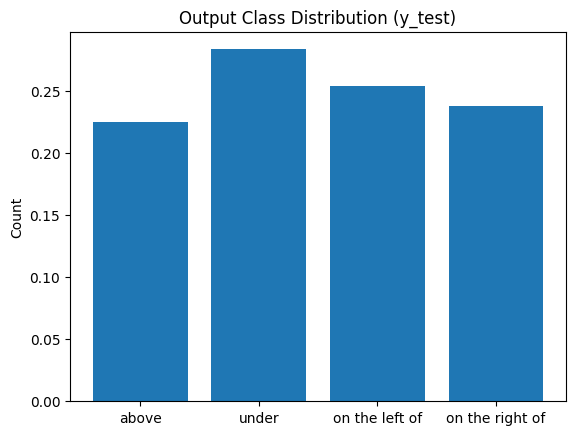

In [351]:
labels = label_decode.values()

plot_bar_chart(y_train, labels=labels, ylabel='Count', title='Output Class Distribution (y_train)', debug_print=True)
plot_bar_chart(y_test, labels=labels, ylabel='Count', title='Output Class Distribution (y_test)', debug_print=True)

# QUESTION 2:  [15 marks]

## You will be developing a multi-class method using the one-vs-rest method. The number of unique classes is four and therefore you need to develop four binary classification models. This necessitates that you extract four one-vs-rest (OvR) training sets out of the full training set.  
## Extract these four OvR datasets. 
## Label the X_train and y_train arrays as X_train_[class] and y_train_[class]
## e.g X_train_above, y_train_above for the class "above"
### Remember to copy the array where necessary and include any necessary sanity checks


In [352]:
from copy import deepcopy

def extract_data(X, y, category):
    return deepcopy(X), (deepcopy(y) == category).astype(np.int16)

In [353]:
X_train_above, y_train_above = extract_data(X_train, y_train, label_encode['above'])
X_train_under, y_train_under = extract_data(X_train, y_train, label_encode['under'])
X_train_on_the_left_of, y_train_on_the_left_of = extract_data(X_train, y_train, label_encode['on the left of'])
X_train_on_the_right_of, y_train_on_the_right_of = extract_data(X_train, y_train, label_encode['on the right of'])

In [354]:
# Sanity Checks (Extracted above from Q1)

print('above:', y_train_above.sum())
assert y_train_above.sum() == 245, "Error in y_train_above"

print('under:', y_train_under.sum())
assert y_train_under.sum() == 232, "Error in y_train_under"

print('on the left of:', y_train_on_the_left_of.sum())
assert y_train_on_the_left_of.sum() == 239, "Error in y_train_on_the_left_of"

print('on the right of:', y_train_on_the_right_of.sum())
assert y_train_on_the_right_of.sum() == 243, "Error in y_train_on_the_right_of"

above: 245
under: 232
on the left of: 239
on the right of: 243


# QUESTION 3:  [40 marks]

## Use the gradient descent algorithm given in this notebook (lr_train_model) to train the four models, one at a time.  In this case you've got six features and so the weight vector per model is of length 7. Use a split ratio of 0.8 (train/val) during training and compute the final accuracy on the test set, post training.
## Label the four models as lr_model_[class], for example lr_model_above for the class "above". Thus the weights and other useful outputs are saved in the respective dictionary ( lr_model_[class] ).


train acc :  0.9256844850065189
val acc   :  0.9166666666666666
Weights :  [-2.65948682 -0.50690477  0.20306653  0.02647343 -1.27373956 -0.08308341
  2.43839671]
test acc  : 0.9416666666666667


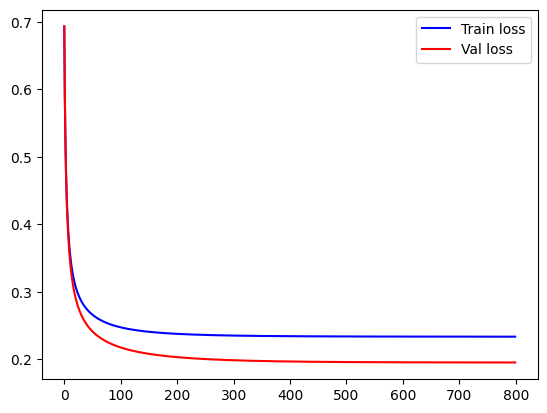

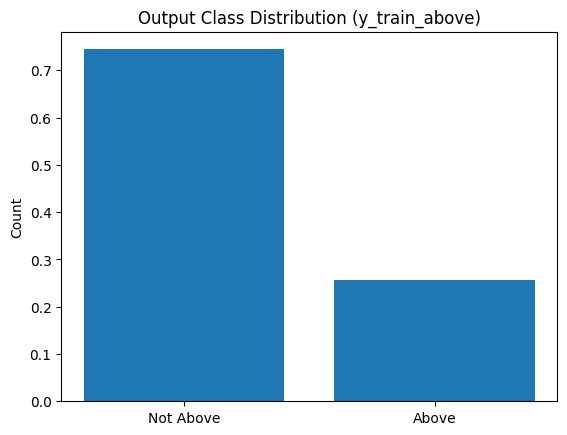

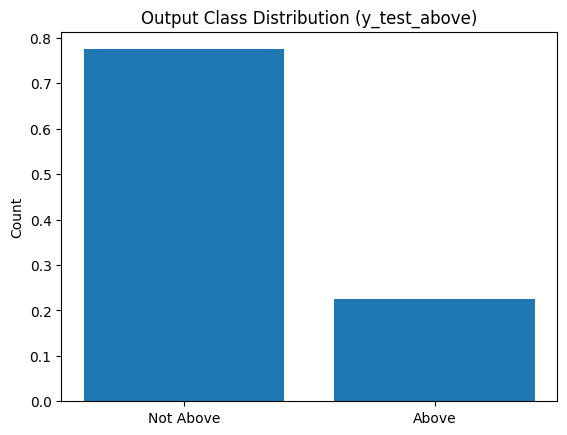

In [355]:
lr_model_above = lr_train_model(X_train_above, y_train_above, no_iterations=800, alpha=1, phi=0.004)
display_results(lr_model_above)

# print test accuracy for "above"
X_test_above, y_test_above = extract_data(X_test, y_test, label_encode['above'])
test_above_acc = get_accuracy(lr_model_above["weights"], X_test_above, y_test_above)
print('test acc  :', test_above_acc)

# plot extracted data distribution for "above"
plot_bar_chart(y_train_above, ylabel='Count', labels=('Not Above', 'Above'), title='Output Class Distribution (y_train_above)')
plot_bar_chart(y_test_above, ylabel='Count', labels=('Not Above', 'Above'), title='Output Class Distribution (y_test_above)')

train acc :  0.9204693611473272
val acc   :  0.921875
Weights :  [-2.4015714  -0.18969741  0.09176875 -0.26947407  0.17897412  0.0085223
 -2.59689841]
test acc  : 0.8875


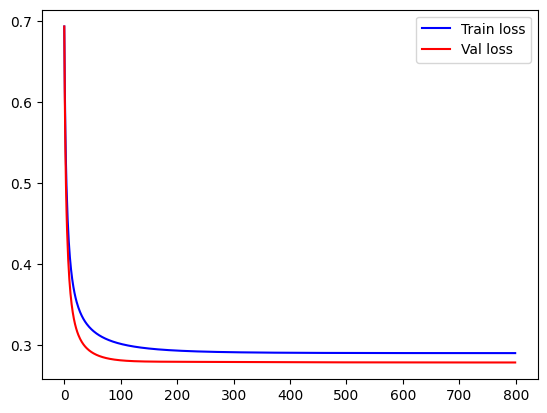

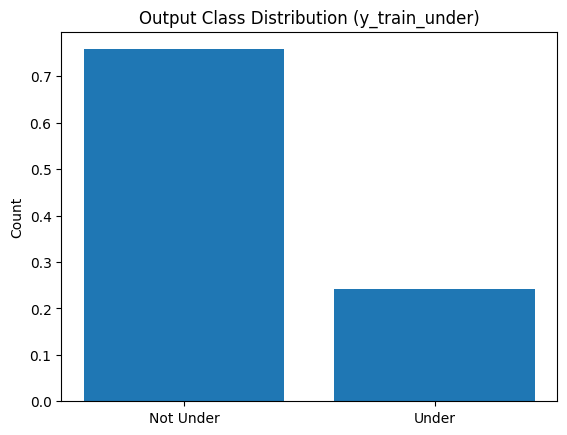

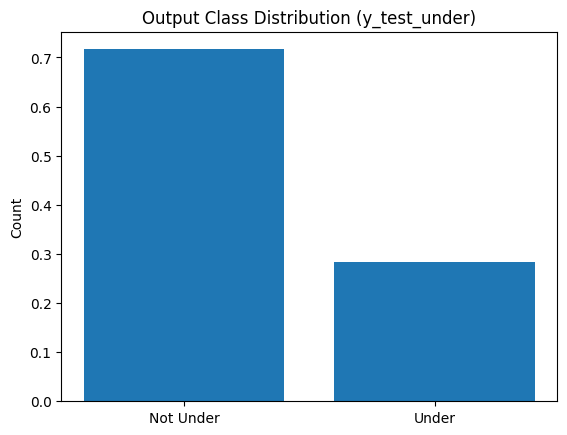

In [356]:
lr_model_under = lr_train_model(X_train_under, y_train_under, no_iterations=800, alpha=1, phi=0.004)
display_results(lr_model_under)

# print test accuracy for "under"
X_test_under, y_test_under = extract_data(X_test, y_test, label_encode['under'])
test_under_acc = get_accuracy(lr_model_under["weights"], X_test_under, y_test_under)
print('test acc  :', test_under_acc)

# plot extracted data distribution for "under"
plot_bar_chart(y_train_under, ylabel='Count', labels=('Not Under', 'Under'), title='Output Class Distribution (y_train_under)')
plot_bar_chart(y_test_under, ylabel='Count', labels=('Not Under', 'Under'), title='Output Class Distribution (y_test_under)')

train acc :  0.9178617992177314
val acc   :  0.9375
Weights :  [-2.56247034  0.21750721 -1.14342478  0.07539473  0.25073896 -2.34598372
  0.07769256]
test acc  : 0.9083333333333333


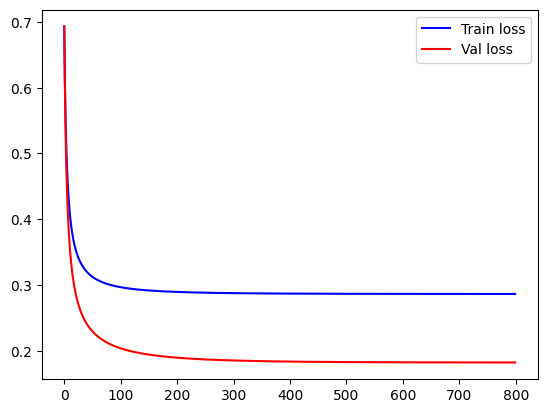

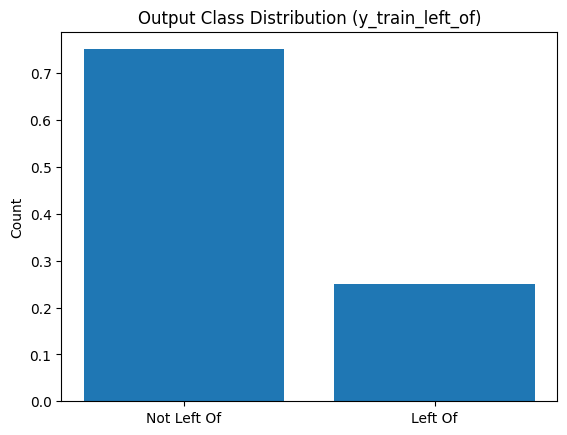

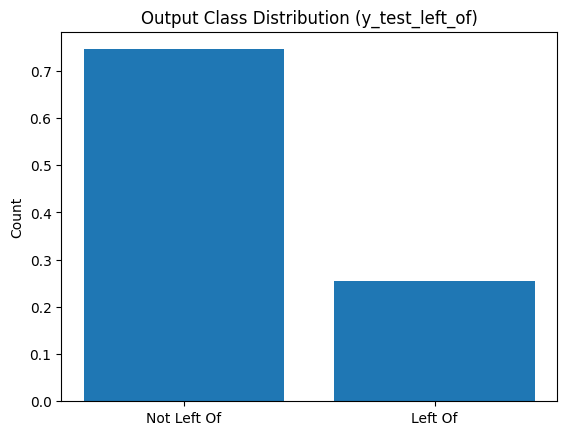

In [357]:
lr_model_left_of = lr_train_model(X_train_on_the_left_of, y_train_on_the_left_of, no_iterations=800, alpha=1, phi=0.004)
display_results(lr_model_left_of)

# print test accuracy for "on the left of"
X_test_left_of, y_test_left_of = extract_data(X_test, y_test, label_encode['on the left of'])
test_left_of_acc = get_accuracy(lr_model_left_of["weights"], X_test_left_of, y_test_left_of)
print('test acc  :', test_left_of_acc)

# plot extracted data distribution for "on the left of"
plot_bar_chart(y_train_on_the_left_of, ylabel='Count', labels=('Not Left Of', 'Left Of'), title='Output Class Distribution (y_train_left_of)')
plot_bar_chart(y_test_left_of, ylabel='Count', labels=('Not Left Of', 'Left Of'), title='Output Class Distribution (y_test_left_of)')

train acc :  0.9491525423728814
val acc   :  0.9270833333333334
Weights :  [-3.1559691   1.22067225 -0.09316445  0.22274836 -0.00522305  2.79909876
  0.18463374]
test acc  : 0.9125


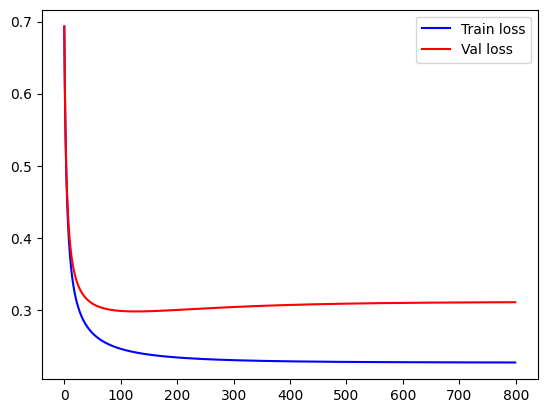

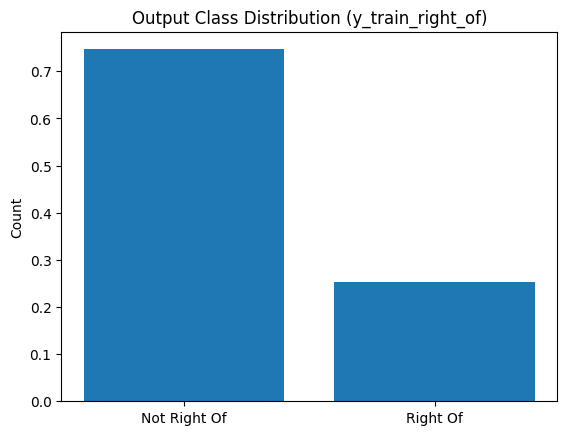

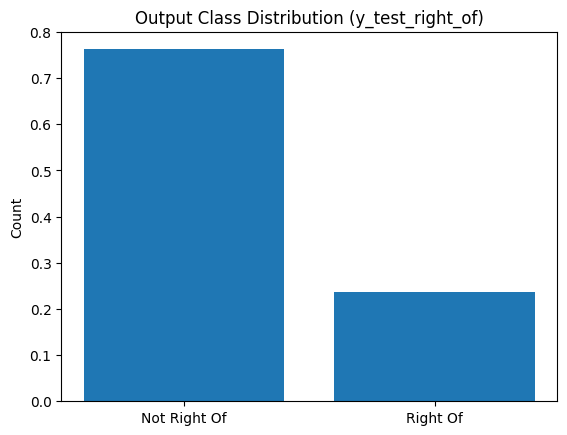

In [358]:
lr_model_right_of = lr_train_model(X_train_on_the_right_of, y_train_on_the_right_of, no_iterations=800, alpha=1, phi=0.004) 
display_results(lr_model_right_of)

# print test accuracy for "on the right of"
X_test_right_of, y_test_right_of = extract_data(X_test, y_test, label_encode['on the right of'])
test_right_of_acc = get_accuracy(lr_model_right_of["weights"], X_test_right_of, y_test_right_of)
print('test acc  :', test_right_of_acc)

# plot extracted data distribution for "on the right of"
plot_bar_chart(y_train_on_the_right_of, ylabel='Count', labels=('Not Right Of', 'Right Of'), title='Output Class Distribution (y_train_right_of)')
plot_bar_chart(y_test_right_of, ylabel='Count', labels=('Not Right Of', 'Right Of'), title='Output Class Distribution (y_test_right_of)')

# Notice

In general the distribution of the training sets and the test sets are visually identical for all four models. Hence, we are guaranteed that our model is being fairly tested.

# QUESTION 4:  [10 marks]
## Compute the overall classification accuracy on the test set.

In [359]:
class MultiClassificationModel:
    def __init__(self, function, size):
        # function: a function built from the weights of the individual OvR models
        self._function = function
        # size: the number of output classifications
        self._size = size

    def predict(self, data):
        return self._function(data)

    def size(self):
        return self._size

# the model is constructed in the same way as described in class

# the classifier which gives the maximum probability is considered to be the
# classification for that sample

def full_model(models):
    return MultiClassificationModel(
        lambda X : np.argmax(
            np.concatenate(
                tuple(map(lambda W : predict_y_prob(W, X), models)),
                axis=1
            ),
            axis=1
        ), 
        len(models)
    )

In [360]:
model = full_model([
    lr_model_above["weights"],
    lr_model_under["weights"],
    lr_model_left_of["weights"], 
    lr_model_right_of["weights"]
    ])

y_pred = model.predict(X_test)

overall_acc = (y_pred == y_test.astype(int)).mean()

print('Overall Accuracy:', overall_acc)

Overall Accuracy: 0.8375


# Question 5 [10 marks]

## Define the 'recall' metric 
## Compute the recall score for each class separately and compare the scores to the accuracies of the individual OvR models
### NOTE: you may need to look up the definition of "recall", which function should be coded from scratch



In [361]:
def get_recall(W, X, y):
    # W is the weight vector [[w_0],[w_1],[w_2],...] of size [N+1,1]
    # where N is number of features, excluding bias
    # X is the feature matrix [m,N] where m is the number of examples
    # y is the gold label vector of size (m,)
    # Computes the recall in predicting the positive class and returns a scalar

    y_pred = (predict_y_prob(W, X) >= 0.5).astype(int)

    true_positives = ((y == 1) & (y_pred.ravel() == 1)).astype(int).sum() 

    false_negatives = ((y == 1) & (y_pred.ravel() == 0)).astype(int).sum()

    return true_positives / (true_positives + false_negatives)

In [362]:
recall_above = get_recall(lr_model_above["weights"], X_test_above, y_test_above)
above_error = np.abs(test_above_acc - recall_above)
print('Above Acc:', test_above_acc)
print("Above Recall:", recall_above)
print("Above Error:", above_error, "\n")

recall_under = get_recall(lr_model_under["weights"], X_test_under, y_test_under)
under_error = np.abs(test_under_acc - recall_under)
print('Under Acc:', test_under_acc)
print("Under Recall:", recall_under)
print("Under Error:", above_error, "\n")

recall_left_of = get_recall(lr_model_left_of["weights"], X_test_left_of, y_test_left_of)
left_of_error = np.abs(test_left_of_acc - recall_left_of)
print('Left Of Acc:', test_left_of_acc)
print("Left Of Recall:", recall_left_of)
print("Left Of Error:", above_error, "\n")

recall_right_of = get_recall(lr_model_right_of["weights"], X_test_right_of, y_test_right_of)
right_of_error = np.abs(test_right_of_acc - recall_right_of)
print('Right Of Acc:', test_right_of_acc)
print("Right Of Recall:", recall_right_of)
print("Right Of Error:", above_error)

Above Acc: 0.9416666666666667
Above Recall: 0.8703703703703703
Above Error: 0.0712962962962963 

Under Acc: 0.8875
Under Recall: 0.7352941176470589
Under Error: 0.0712962962962963 

Left Of Acc: 0.9083333333333333
Left Of Recall: 0.9016393442622951
Left Of Error: 0.0712962962962963 

Right Of Acc: 0.9125
Right Of Recall: 0.9122807017543859
Right Of Error: 0.0712962962962963


# Notice

The absolute error of recall and accuracy is constant for all four classifications models.

# Question 6 [15 marks]

## Define the confusion matrix
## Compute the confusion matrix and determine which class (or classes in case of a tie) is/are least confused with recalling "on the right of".
### NOTE: you may need to look up the definition of "confusion matrix", which function should be coded from scratch



In [363]:
# NOTE: This is a test to make sure
# the results we obtained are correct and
# similar to sklearn

import sklearn.linear_model as linear_model

model2 = linear_model.LogisticRegression(C=1/0.004, penalty="l2", multi_class="ovr")
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print('Actual:                 ', y_test[:20].astype(int))
print('"Homebrew" Predicitions:', y_pred[:20].astype(int))
print('Sklearn Predicitions:   ', y_pred2[:20].astype(int), '\n')
print('Difference (In Predictions) Between "Homebrew" & Sklearn:', ((y_pred == y_pred2) ^ True).astype(int).sum())

Actual:                  [2 2 0 2 1 3 0 0 2 1 0 3 1 1 1 3 3 0 0 1]
"Homebrew" Predicitions: [2 2 0 2 1 3 2 0 2 1 3 3 2 3 3 3 1 2 0 1]
Sklearn Predicitions:    [2 2 0 2 1 3 2 0 2 1 3 3 2 3 3 3 1 2 0 1] 

Difference (In Predictions) Between "Homebrew" & Sklearn: 1


In [378]:
def confusion_matrix(model, X, y_actual, normalize=False):
    y_pred = model.predict(X)

    size = model.size()

    matrix = np.empty((size, size))

    # calculate the values of the confusion matrix

    for i in range(size):
        for j in range(size):
            matrix[i, j] = ((y_actual == i) & (y_pred == j)).astype(int).sum()

    assert matrix.ravel().sum() == len(X_test), "Error in confusion_matrix"

    # normalize the matrix row-wise

    if normalize == True:
        matrix = matrix / matrix.sum(axis=1)[:, np.newaxis]

    return matrix

In [379]:
cm = confusion_matrix(model, X_test, y_test)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[46.  0.  4.  4.]
 [ 1. 50. 10.  7.]
 [ 1.  4. 54.  2.]
 [ 3.  2.  1. 51.]]


# Assumptions & Explanation

The following will be an explanation of the chosen
interpretation for the second part of the question.

> 'determine which class (or classes in case of a tie)
> is/are least confused with recalling "on the right of"'

It will be assumed that the second part of the question is
equivalent to the following formulation. 

> Calculate the corresponding likely-hoods following the two
> rules below for all the four categories: "above", "under",
> "on the left of" and "on the right of".
>
> 1. If $x$ is not actually "on the right", then how likely
> is the full model to incorrectly predict "on the right".
> 
> 2. If $x$ is actually "on the right", then how likely
> is the full model to incorrectly predict not "on the right".
>
> (Clearly, there are three classes which follow the first
> rule, they are "above", "under" and "on the left of" and
> there is one class which follows the second rule, it is
> "on the right of".) 
>
> Then pick the classes which have the lowest probability.
>
> These classes are then said to be the classes which get the
> least confused when recalling "on the right of".

For calculating such likely-hoods the confusion matrix will
be useful.

Let the confusion matrix $C$ be defined as follows
$$
C = 
\left(
\begin{array}{cccc}
    c_{0,0} & c_{0,1} & c_{0,2} & c_{0,3} \\
    c_{1,0} & c_{1,1} & c_{1,2} & c_{1,3} \\
    c_{2,0} & c_{2,1} & c_{2,2} & c_{2,3} \\
    c_{3,0} & c_{3,1} & c_{3,2} & c_{3,3} \\
\end{array}
\right)
$$
where $c_{i, j}$ is number of times our full model predicted
$j$ and the actual was $i$. In this case as established above
(in one of the code cells) the following encoding will be used:

- $0 \sim \text{``above''}$
- $1 \sim \text{``under''}$
- $2 \sim \text{``on the left of''}$
- $3 \sim \text{``on the right of''}$

Now the computation of the probabilities described in the rules
will be considered.

Assuming that $x$ is not "on the right of", then the
probability of the model incorrectly predicting
"on the right of" is $\frac{c_{i, 3}}{c_{i,i} + c_{i, 3}}$
where $i \neq 3$ (since $x$ in not "on the right of").
**Note:** This value is the complement of the modified
recall metric of the classifier for $i$ with
respect to $3$. The modified recall metric does not
consider all false negatives instead it
only considers a class of false negatives, in
this case "on the right of".

Assuming that $x$ is "on the right of", then the
probability of the model incorrectly predicting not
"on the right of" is $\frac{c_{3, 0} + c_{3, 1} + c_{3, 2}}{c_{3, 0} + c_{3, 1} + c_{3, 2} + c_{3, 3}}$.
**Note:** This value is the complement of the recall
metric of the classifier for the "on the right of"
class.

The code below essentially implements the above but generalized.

In [366]:
def find_least_confused_class(confusion_matrix, pred_class, label_decode=None):
    rates_of_confusion = []

    for i in range(confusion_matrix.shape[0]):
        if i != pred_class:
            rate = confusion_matrix[i, pred_class] / (confusion_matrix[i, i] + confusion_matrix[i, pred_class])
        else:
            rate = 1 - confusion_matrix[i, i] / confusion_matrix[i].sum()

        if label_decode == None:
            rates_of_confusion.append(np.array([i, rate]))
        else:
            rates_of_confusion.append(np.array([label_decode[i], rate]))

    rates_of_confusion = np.array(rates_of_confusion)

    return rates_of_confusion[np.argsort(rates_of_confusion[:, 1])]

In [367]:
print(find_least_confused_class(cm, label_encode['on the right of'], label_decode=label_decode))

[['on the left of' '0.03571428571428571']
 ['above' '0.08']
 ['on the right of' '0.10526315789473684']
 ['under' '0.12280701754385964']]


# Notice

**The class which is least likely to be confused with 'on the right of' upon
recalling is 'on the left of'**.  This I believe also makes intuitive sense since
if an object is to the left of another it is very difficult to confuse the
position of the first object as being to the right of the second. However, if an
object is above of another, it might be above and slightly to right, or below
and slightly to the right, hence confusion is more plausible.